<a href="https://colab.research.google.com/github/fahriyegrl/perceptron_linear_separability_python/blob/main/perceptron_linear_separability_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Loading the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [ ]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


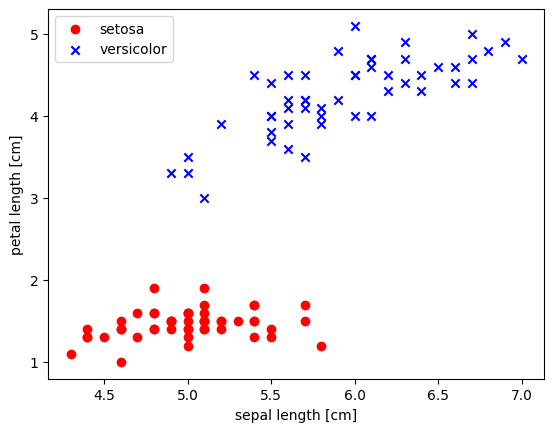

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    iter_trained : int
      The number of iterations it took for training.

    """
    def __init__(self, n_iter=50, random_state=1, eta=1): #I added eta for learning rate for the upcoming question, it has no affect here since it is 1.
        self.n_iter = n_iter
        self.random_state = random_state
        self.iter_trained = -1
        self.weight_history_data = [] # I added it so we can store the weights once updated.
        self.eta = eta  # I assign the learning rate to 1. For the next question, I will assign it to different value.


    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        X= np.array(X)   # I change to data to numpy
        y = np.array(y)  # I change to data to numpy
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []


        for _ in range(self.n_iter):
            errors = 0

            for xi, target in zip(X, y):
                #update = self.predict(xi) - I commened out here bc target the order should be target-prediction
                update = target - self.predict(xi)   # I updated the update.

                self.w_[1:] += update * xi * self.eta # I aded learning rate. no affect here since it is 1
                self.w_[0] += update * self.eta # I aded learning rate. no affect here since it is 1
                #print(f"update: {update}")
                errors += int(update != 0.0)
                #print(f"errors per data: {errors}")
                self.weight_history_data.append(self.w_.copy())  # I start storing the weights here
                #print(f"updated weigths: {self.weight_history_data}")

            self.errors_.append(errors)
            #print(f"errors per iter: {self.errors_}")
            self.iter_trained += 1  # Increment the iteration counter


            if errors == 0: # at this points we can stop since there is no missclassification
              print(f"the number of iterations required for the training: {self.iter_trained}")

              break


            ###### New code for doing nothing. - MEH
            this_code_does_nothing = True
            ######

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
## Practicing
random_state1 = 42
rgen1 = np.random.RandomState(random_state1)
print(rgen)
w1 = rgen1.normal(loc=0.0, scale=0.01, size=3)


RandomState(MT19937)


In [ ]:
## Practicing
print(w1)

[ 0.00496714 -0.00138264  0.00647689]


In [ ]:
## Practicing
X_dummy = [[-0.88130512, -1.88478931],
    [ 0.15370496, -0.43082738],
    [ 1.0445006 ,  0.657627  ]]
y_dummy = [1, -1, 1]
perceptron1 = Perceptron(n_iter=5, random_state=1)
perceptron1.fit(X_dummy, y_dummy)

errors per iter: [2]
errors per iter: [2, 3]
errors per iter: [2, 3, 2]
errors per iter: [2, 3, 2, 2]
errors per iter: [2, 3, 2, 2, 1]


In [ ]:
## Practicing
perceptron1.errors_, perceptron1.iter_trained, perceptron1.weight_history_data

([2, 3, 2, 2, 1],
 4,
 [array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684]),
  array([0.01624345, 1.19861596, 0.70959684])])

In [ ]:
 ## Practicing
 X_dummy= np.array(X_dummy)
 X_dummy, X_dummy.shape


(array([[-0.88130512, -1.88478931],
        [ 0.15370496, -0.43082738],
        [ 1.0445006 ,  0.657627  ]]),
 (3, 2))

In [ ]:
 ## Practicing
update1 = 0
a =int(update1 != 0.0)
a

0

In [ ]:
 ## Practicing
random_state1=42
a = np.random.RandomState(random_state1)


In [ ]:
#Practicing; to make sure I use the correct data
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y[:5]

array([-1, -1, -1, -1, -1])

In [ ]:
#Practicing; to make sure I use the correct data
X = df.iloc[:100, [0, 2]].values
X[:3], X.shape

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3]]),
 (100, 2))

-----------------------
-----------------------
-----------------------


In [ ]:
##practicing
ppn.errors_

[4, 5, 5, 5, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 0]

In [ ]:
# practicing
learning_rates = [0.00001, 0.0001, 0.01]
results = {}

for lr in learning_rates:
    ppn = Perceptron(eta=lr, n_iter=10, random_state=1)
    ppn.fit(X, y)
    results[lr] = ppn.iter_trained
    print(ppn.errors_)

# Display results
for lr, iterations in results.items():
    print(f'Learning Rate: {lr}, Iterations: {iterations}')

[40, 32, 30, 26, 24, 21, 19, 17, 15, 14]
[4, 5, 5, 5, 4, 2, 3, 2, 3, 2]
the number of iterations required for the training: 5
[1, 3, 3, 2, 1, 0]
Learning Rate: 1e-05, Iterations: 9
Learning Rate: 0.0001, Iterations: 9
Learning Rate: 0.01, Iterations: 5


In [ ]:
# practicing
random_states = [1, 42]  # Different random states
patterns = {}

for r in random_states:
    ppn = Perceptron(eta=0.01, n_iter=20, random_state=r)
    ppn.fit(X, y)
    patterns[r] = ppn.errors_
    print(ppn.errors_)

# Display results
for r, error in patterns.items():
    print(f'Learning Rate: {r}, Iterations: {error}')


the number of iterations required for the training: 5
[1, 3, 3, 2, 1, 0]
the number of iterations required for the training: 5
[2, 2, 3, 2, 1, 0]
Learning Rate: 1, Iterations: [1, 3, 3, 2, 1, 0]
Learning Rate: 42, Iterations: [2, 2, 3, 2, 1, 0]


In [ ]:
# practicing
learning_rates = [0.00001, 0.0001, 0.01]
results = {}

for lr in learning_rates:
    ppn = Perceptron(eta=lr, n_iter=20, random_state=1)
    ppn.fit(X, y)
    results[lr] = ppn.iter_trained
    print(ppn.errors_)

# Display results
for lr, iterations in results.items():
    print(f'Learning Rate: {lr}, Iterations: {iterations}')

[40, 32, 30, 26, 24, 21, 19, 17, 15, 14, 12, 11, 10, 9, 8, 8, 6, 6, 5, 5]
the number of iterations required for the training: 15
[4, 5, 5, 5, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 0]
the number of iterations required for the training: 5
[1, 3, 3, 2, 1, 0]
Learning Rate: 1e-05, Iterations: 19
Learning Rate: 0.0001, Iterations: 15
Learning Rate: 0.01, Iterations: 5


In [ ]:
# practicing
learning_rates = [0.00001, 0.0001,  0.01]
results = {}

for lr in learning_rates:
    ppn = Perceptron(eta=lr, n_iter=30, random_state=1)
    ppn.fit(X, y)
    results[lr] = ppn.iter_trained
    print(ppn.errors_)

# Display results
for lr, iterations in results.items():
    print(f'Learning Rate: {lr}, Iterations: {iterations}')

[40, 32, 30, 26, 24, 21, 19, 17, 15, 14, 12, 11, 10, 9, 8, 8, 6, 6, 5, 5, 6, 5, 4, 3, 3, 4, 4, 2, 3, 3]
the number of iterations required for the training: 15
[4, 5, 5, 5, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 0]
the number of iterations required for the training: 5
[1, 3, 3, 2, 1, 0]
Learning Rate: 1e-05, Iterations: 29
Learning Rate: 0.0001, Iterations: 15
Learning Rate: 0.01, Iterations: 5


In [ ]:
# practicing
learning_rates = [0.00001, 0.0001, 0.01]
results = {}

for lr in learning_rates:
    ppn = Perceptron(eta=lr, n_iter=40, random_state=1)
    ppn.fit(X, y)
    results[lr] = ppn.iter_trained
    print(ppn.errors_)

# Display results
for lr, iterations in results.items():
    print(f'Learning Rate: {lr}, Iterations: {iterations}')

the number of iterations required for the training: 39
[40, 32, 30, 26, 24, 21, 19, 17, 15, 14, 12, 11, 10, 9, 8, 8, 6, 6, 5, 5, 6, 5, 4, 3, 3, 4, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 1, 0]
the number of iterations required for the training: 15
[4, 5, 5, 5, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 0]
the number of iterations required for the training: 5
[1, 3, 3, 2, 1, 0]
Learning Rate: 1e-05, Iterations: 39
Learning Rate: 0.0001, Iterations: 15
Learning Rate: 0.01, Iterations: 5


In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    x2_min, x2_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

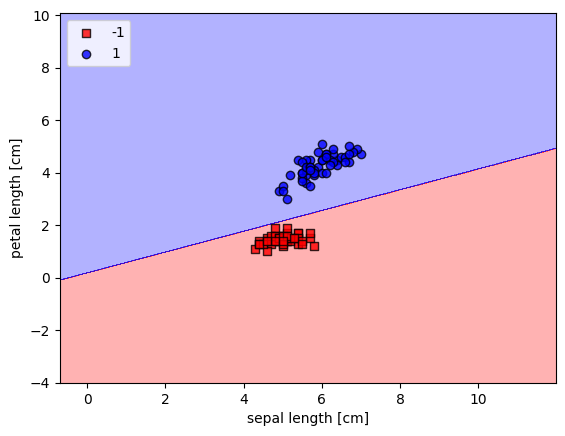

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

the number of iterations required for the training: 4


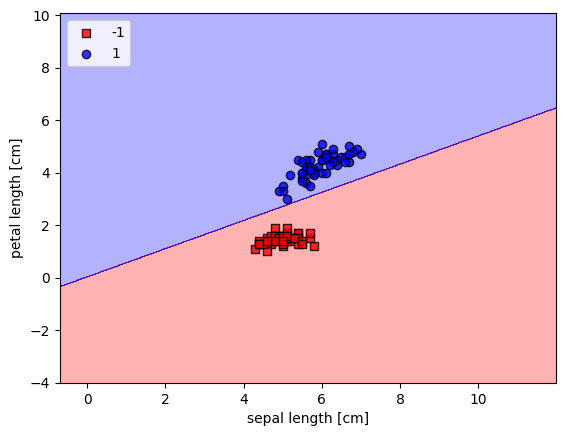

In [ ]:
ppn_3 = Perceptron(eta=0.005, n_iter=10, random_state=3)
ppn_3.fit(X, y)
plot_decision_regions(X, y, classifier= ppn_3)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


plt.show()

In [ ]:
#establish a random shuffle
s = np.arange(10)
print(s)
np.random.shuffle(s)
#shuffle sample
X_shuffle = X[s];
y_shuffle = y[s];
print(X_shuffle)
print(y_shuffle)

[0 1 2 3 4 5 6 7 8 9]
[[4.9 1.4]
 [4.7 1.3]
 [4.4 1.4]
 [4.6 1.4]
 [5.  1.5]
 [4.6 1.5]
 [5.1 1.4]
 [5.  1.4]
 [5.4 1.7]
 [4.9 1.5]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


the number of iterations required for the training: 17


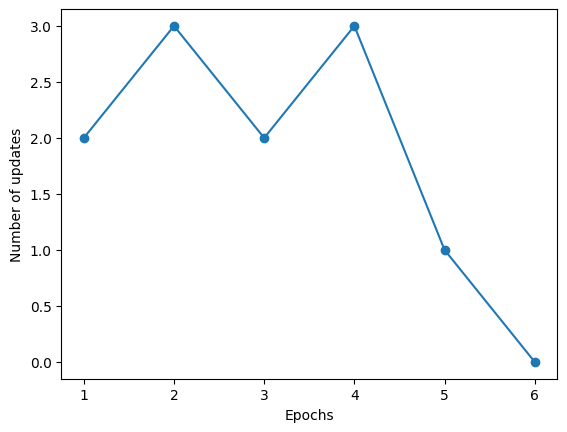

In [ ]:
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

the number of iterations required for the training: 5
the number of iterations required for the training: 1


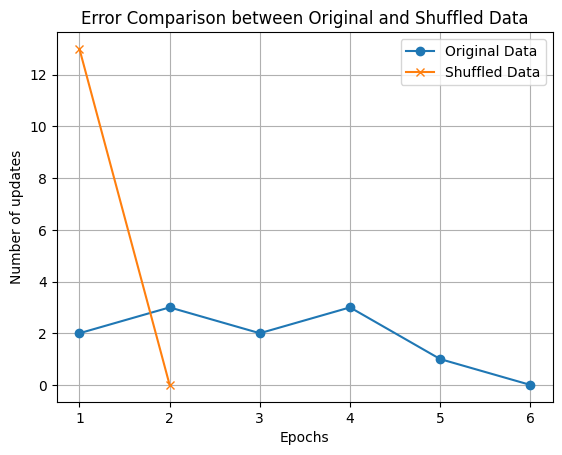

In [ ]:
##practice
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib.colors import ListedColormap
ppn = Perceptron(eta=0.001, n_iter=50, random_state=3)

# Train on original data
ppn.fit(X, y)
original_errors = ppn.errors_  # Store the errors for original data

# Shuffle the data
X_shuffled, y_shuffled = shuffle(X, y, random_state=3)


ppn_shuffled = Perceptron(eta=0.001, n_iter=50, random_state=3)

# Train on shuffled data
ppn_shuffled.fit(X_shuffled, y_shuffled)
shuffled_errors = ppn_shuffled.errors_  # Store the errors for shuffled data

# Plot the error for both training processes
plt.plot(range(1, len(original_errors) + 1), original_errors, marker='o', label='Original Data')
plt.plot(range(1, len(shuffled_errors) + 1), shuffled_errors, marker='x', label='Shuffled Data')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Error Comparison between Original and Shuffled Data')
plt.legend()
plt.grid()
plt.show()


In [ ]:
## Practicing :  Ipractice here how plow 2 different dataset: originial and transformed
X.shape, y.shape
a=1.0000001
b=1.00000000005
c=0.0001

X[:3]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

In [ ]:
## Practicing
X_trannsformed = np.array([[a*x[0] - c, b*x[1]-c] for x in X])
X_trannsformed[:3]

array([[5.09990051, 1.3999    ],
       [4.89990049, 1.3999    ],
       [4.69990047, 1.2999    ]])

In [ ]:
## Practicing
X_trannsformed.shape

(100, 2)

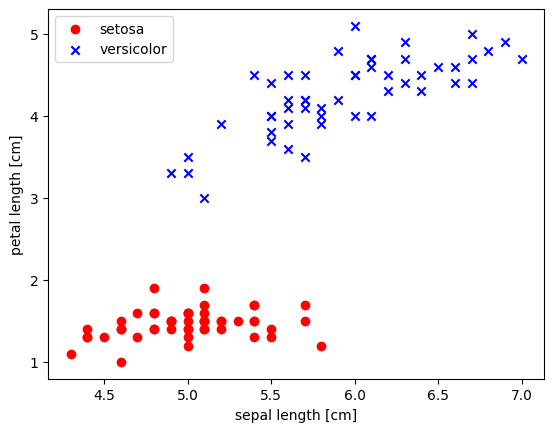

In [ ]:
# practicing
#I just copied and pasted the code aboce we used before here:

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

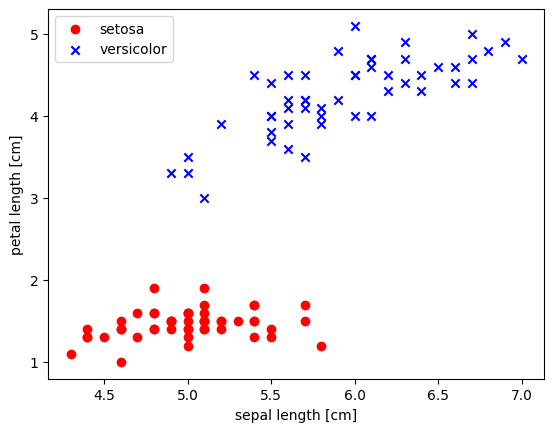

In [ ]:
# practicing
plt.scatter(X_trannsformed[:50, 0], X_trannsformed[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_trannsformed[50:100, 0], X_trannsformed[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()